In [2]:
autosave 30

Autosaving every 30 seconds


In [1]:
#Various imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Descrizione del dataset
Available at: [*Weather in Szeged*](https://www.kaggle.com/budincsevity/szeged-weather/discussion)

In [62]:
#Define paths
df_path = "./resources/weatherHistory.csv"
destination_path = "./results/"

In [12]:
#Defining portion for train, validation and testing phase
validation_portion = 0.3
test_portion = 0.1 

In [5]:
#Load the dataset from memory 
df = pd.read_csv(df_path)

In [6]:
#Print dataset's head                     
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [7]:
#Printing features' information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
#Printing some feature's information
df.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

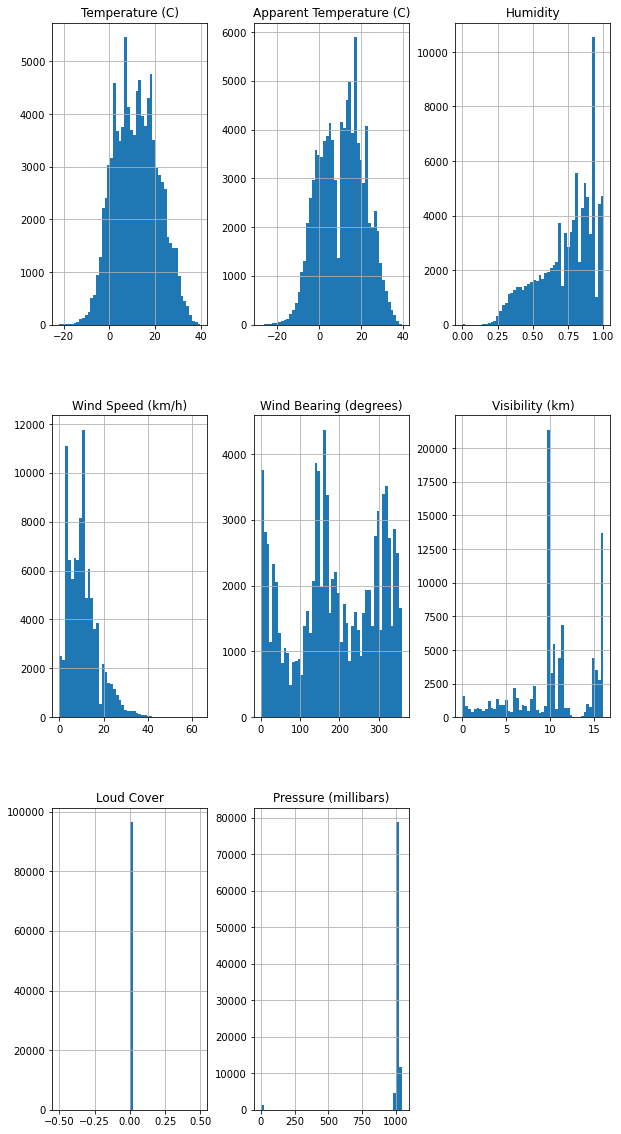

In [26]:
#Print data distribution
df.hist(bins = 50, figsize = (10,20))
plt.show()

In [13]:
#Splitting the dataset into train, validation and test dataset
[dfTrain,dfTest] = train_test_split(df,random_state=1,test_size=test_portion) 
[dfTrain,dfValidation] = train_test_split(dfTrain,random_state=1,test_size=validation_portion) 

# First regression: Correlation between Temperature And Humidity

In [14]:
result_path = "/results_Temperature_Humidity.txt"

In [30]:
x_train = dfTrain["Temperature (C)"].values
y_train = dfTrain["Humidity"].values

x_validation = dfValidation["Temperature (C)"].values
y_validation = dfValidation["Humidity"].values

x_test = dfTest["Temperature (C)"].values

x_train = np.reshape(x_train,(-1,1))
x_validation = np.reshape(x_validation,(-1,1))
x_test = np.reshape(x_test,(-1,1))

In [31]:
reg = LinearRegression()

reg.fit(x_train,y_train)

print(f"Intercept: {reg.intercept_}")
print(f"Coefficient: {reg.coef_}")

Intercept: 0.8894807259742661
Coefficient: [-0.01295996]


In [58]:
y_train_predicted = reg.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predicted))
print(f"RMSE train set: {rmse_train}")

y_validation_predicted = reg.predict(x_validation)
rmse_validation = np.sqrt(mean_squared_error(y_validation,y_validation_predicted))
print(f"RMSE validation set: {rmse_validation}")

RMSE train set: 0.15114404460366634
RMSE validation set: 0.15180928055749712


In [66]:
R2_score_validation = reg.score(x_validation,y_validation)
print(f"R2 score validation: {R2_score_validation}")

R2 score validation: 0.3993329054240695


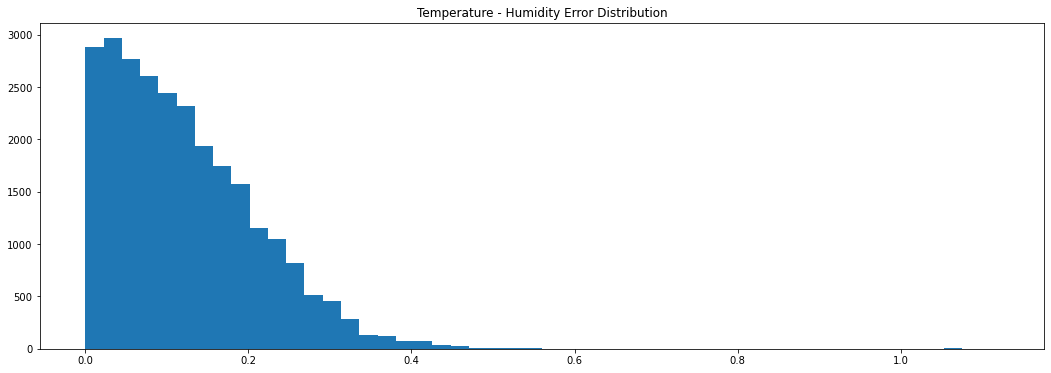

In [43]:
residuals = np.abs(y_validation - y_validation_predicted)
#Print errors distribution
plt.figure(figsize=(18,6))
plt.title("Temperature - Humidity Error Distribution")
plt.hist(x = residuals, bins = 50)
plt.show()

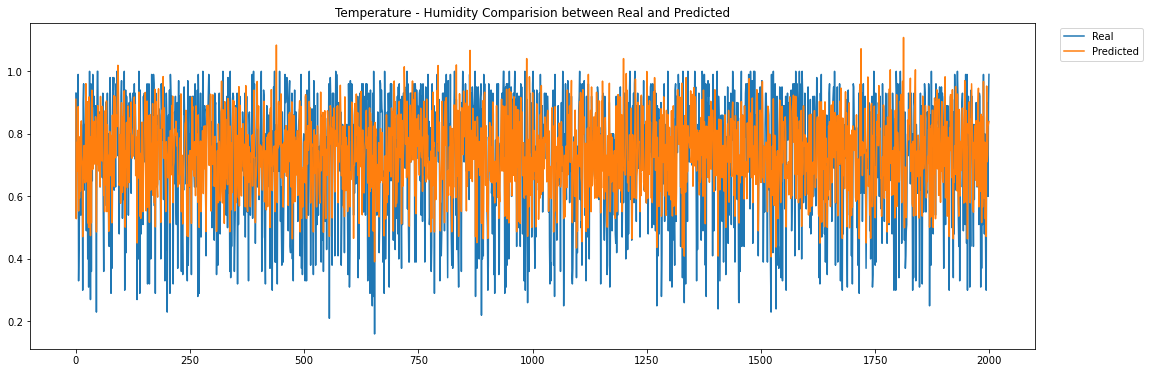

In [55]:
plt.figure(figsize=(18,6))
plt.plot(y_validation[0:2000], label ="Real")
plt.title("Temperature - Humidity Comparision between Real and Predicted")
plt.plot(y_validation_predicted[0:2000], label="Predicted")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",  borderaxespad=0.5)
plt.show()

In [65]:
x_test_predicted = reg.predict(x_test)
rmse_test = mean_squared_error(x_test,x_test_predicted)
print(f"RMSE test {rmse_test}")
np.savetxt(destination_path + result_path,predictions)

RMSE test 218.73902663177398
